# Semana 6 - Actividad 1
## Alumno: Luis José Navarrete Baduy
## Matrícula: A01793919
## Profesora: María de la Paz Rico Fernández
## Fecha: 31 de octubre del 2022

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Descarga los datos y carga el dataset en tu libreta

In [2]:
data_url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
df = pd.read_csv(data_url)

### Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [3]:
df.shape

(30000, 25)

In [4]:
df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [5]:
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [6]:
df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [7]:
cat_columns = ['ID', 'X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'Y']
for i in cat_columns:
    df[i] = df[i].astype('category')
df.dtypes

ID     category
X1        int64
X2     category
X3     category
X4     category
X5      float64
X6     category
X7     category
X8     category
X9     category
X10    category
X11    category
X12     float64
X13     float64
X14     float64
X15     float64
X16     float64
X17     float64
X18     float64
X19     float64
X20     float64
X21     float64
X22     float64
X23     float64
Y      category
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   ID      30000 non-null  category
 1   X1      30000 non-null  int64   
 2   X2      29999 non-null  category
 3   X3      29998 non-null  category
 4   X4      29998 non-null  category
 5   X5      29995 non-null  float64 
 6   X6      29997 non-null  category
 7   X7      29995 non-null  category
 8   X8      29993 non-null  category
 9   X9      29991 non-null  category
 10  X10     29984 non-null  category
 11  X11     29986 non-null  category
 12  X12     29989 non-null  float64 
 13  X13     29989 non-null  float64 
 14  X14     29987 non-null  float64 
 15  X15     29985 non-null  float64 
 16  X16     29983 non-null  float64 
 17  X17     29990 non-null  float64 
 18  X18     29992 non-null  float64 
 19  X19     29991 non-null  float64 
 20  X20     29992 non-null  float64 
 21  X21     2998

In [9]:
df.isna().sum()

ID      0
X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

### Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [10]:
# Eliminar columna ID y registros con valores nulos
df.drop('ID', axis=1, inplace=True) # remover columna id
df.dropna(inplace=True)

In [11]:
df.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

### Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [12]:
df.describe()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,35.483443,51248.119901,49200.493825,4.703239e+04,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025
std,129737.299088,9.214319,73674.949943,71211.232744,6.938524e+04,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3559.250000,2984.000000,2.664750e+03,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000
50%,140000.000000,34.000000,22379.000000,21194.500000,2.008550e+04,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67190.000000,64027.750000,6.018300e+04,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


Se puede observar que en la mayoría de las variables el valor máximo es muy alto lo cual indica que se presentan muchos outliers en los registros al igual que la escala es muy diferente entre los cuartiles.

In [13]:
df.describe(include='category')

,X2,X3,X4,X6,X7,X8,X9,X10,X11,Y
count,29958.0,29958.0,29958.0,29958.0,29958.0,29958.0,29958.0,29958.0,29958.0,29958.0
unique,2.0,7.0,4.0,11.0,11.0,11.0,11.0,10.0,10.0,2.0
top,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,18095.0,14009.0,15939.0,14717.0,15709.0,15742.0,16431.0,16925.0,16266.0,23333.0


### Realiza el conteo de las variables categóricas

In [14]:
for v in [v for v in cat_columns if v != 'ID']:
    print(v)
    print(df[v].value_counts())

X2
2.0    18095
1.0    11863
Name: X2, dtype: int64
X3
2.0    14009
1.0    10572
3.0     4909
5.0      280
4.0      123
6.0       51
0.0       14
Name: X3, dtype: int64
X4
2.0    15939
1.0    13643
3.0      322
0.0       54
Name: X4, dtype: int64
X6
0.0     14717
-1.0     5680
1.0      3678
-2.0     2758
2.0      2662
3.0       322
4.0        76
5.0        26
8.0        19
6.0        11
7.0         9
Name: X6, dtype: int64
X7
0.0     15709
-1.0     6042
2.0      3918
-2.0     3778
3.0       326
4.0        99
1.0        28
5.0        25
7.0        20
6.0        12
8.0         1
Name: X7, dtype: int64
X8
0.0     15742
-1.0     5930
-2.0     4082
2.0      3811
3.0       240
4.0        76
7.0        27
6.0        23
5.0        21
1.0         4
8.0         2
Name: X8, dtype: int64
X9
0.0     16431
-1.0     5681
-2.0     4343
2.0      3154
3.0       179
4.0        69
7.0        57
5.0        35
6.0         5
8.0         2
1.0         2
Name: X9, dtype: int64
X10
0.0     16925
-1.0     5533
-

In [15]:
def getVarianceInfo(data: pd.DataFrame):
    totalVariance = data.var().sum()
    print('Total variance {0}'.format(totalVariance))
    sum_variance = 0
    var, sum_var = list(), list()
    for i in data.columns.values.tolist():
        variance = data[i].var()/totalVariance
        sum_variance += variance
        print(f'Varianza {i}: {((variance)*100).round(2)}%, total: {round(sum_variance*100, 2)}%')
        var.append(((variance)*100).round(2))
        sum_var.append(round(sum_variance*100, 2))
    return var, sum_var

### Escala los datos, si consideras necesario

In [16]:
# Escalando los datos
scaler = StandardScaler()
num_cols = [v for v in df.columns.values.tolist()if v not in cat_columns]
print(num_cols)
df2 = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)
df2.head()

['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']


,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


In [17]:
v, f = getVarianceInfo(df2)

Total variance 14.00046733651562
Varianza X1: 7.14%, total: 7.14%
Varianza X5: 7.14%, total: 14.29%
Varianza X12: 7.14%, total: 21.43%
Varianza X13: 7.14%, total: 28.57%
Varianza X14: 7.14%, total: 35.71%
Varianza X15: 7.14%, total: 42.86%
Varianza X16: 7.14%, total: 50.0%
Varianza X17: 7.14%, total: 57.14%
Varianza X18: 7.14%, total: 64.29%
Varianza X19: 7.14%, total: 71.43%
Varianza X20: 7.14%, total: 78.57%
Varianza X21: 7.14%, total: 85.71%
Varianza X22: 7.14%, total: 92.86%
Varianza X23: 7.14%, total: 100.0%


### Reduce las dimensiones con PCA, si consideras necesario.

In [18]:
pcs = PCA()
components = pcs.fit_transform(df2)
components.shape

(29958, 14)

### Elabora los histogramas de los atributos para visualizar su distribución

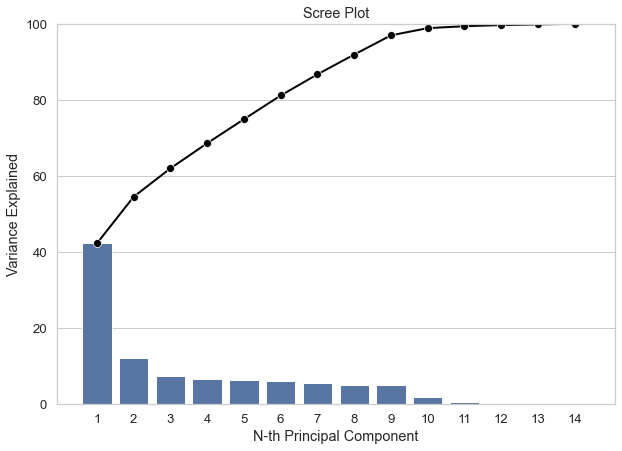

In [19]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_*100, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_)*100, 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 100)
plt.show()

In [20]:
PC_columns = [f'PC{i}' for i in np.arange(pcs.n_components_) + 1]

In [21]:
# df with feature importance
data = pd.DataFrame(pcs.components_, columns=PC_columns, index = df2.columns)
data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
X1,0.165507,0.032789,0.372446,0.383253,0.388264,0.391557,0.388505,0.380672,0.135120,0.116768,0.128056,0.116903,0.113741,0.105481
X5,0.300709,0.071906,-0.190793,-0.174644,-0.126883,-0.120403,-0.105928,-0.094157,0.383194,0.408391,0.392339,0.349613,0.303923,0.323529
X12,-0.378575,-0.869471,-0.034207,-0.001814,0.034747,0.034073,0.033882,0.018489,0.173845,0.200925,0.122065,0.062272,-0.060900,-0.050896
X13,-0.200103,0.338990,-0.063899,0.007629,0.060528,0.074774,0.039553,-0.070616,0.362055,0.345745,0.244688,-0.094736,-0.609833,-0.365692
X14,0.035312,-0.039760,0.041391,0.083164,0.113790,0.028378,-0.106756,-0.164986,0.225652,0.148714,-0.239600,-0.577791,-0.193395,0.659155
X15,-0.078883,0.071461,-0.043987,-0.028824,0.099239,0.014527,-0.099290,0.069272,0.040574,0.408361,-0.108158,-0.500809,0.602388,-0.409151
X16,0.111239,-0.078816,0.008169,-0.032444,-0.121162,0.126494,-0.007584,0.007892,-0.201646,-0.278835,0.785216,-0.462241,0.014301,0.025459
X17,-0.046381,0.027368,0.009341,-0.135636,0.093077,0.039157,0.049781,-0.000282,-0.748694,0.578491,0.068216,0.077764,-0.164877,0.181276
X18,-0.821996,0.330346,0.010348,0.016872,-0.018607,0.019109,0.023701,0.058701,0.019949,-0.110712,0.152990,0.098813,0.252920,0.316686
X19,-0.029201,-0.009011,0.566716,0.386872,0.122863,-0.205260,-0.419992,-0.488861,-0.056581,0.050854,0.144908,0.124098,0.060003,-0.099178


In [22]:
data.iloc[:,:4].abs().idxmax() # Variables con mayor importancia en cada componente

PC1    X18
PC2    X12
PC3    X19
PC4    X23
dtype: object

In [23]:
data.iloc[:,:4].abs().idxmin() # Variables con menor importancia en cada componente

PC1    X22
PC2    X22
PC3    X16
PC4    X12
dtype: object

### Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

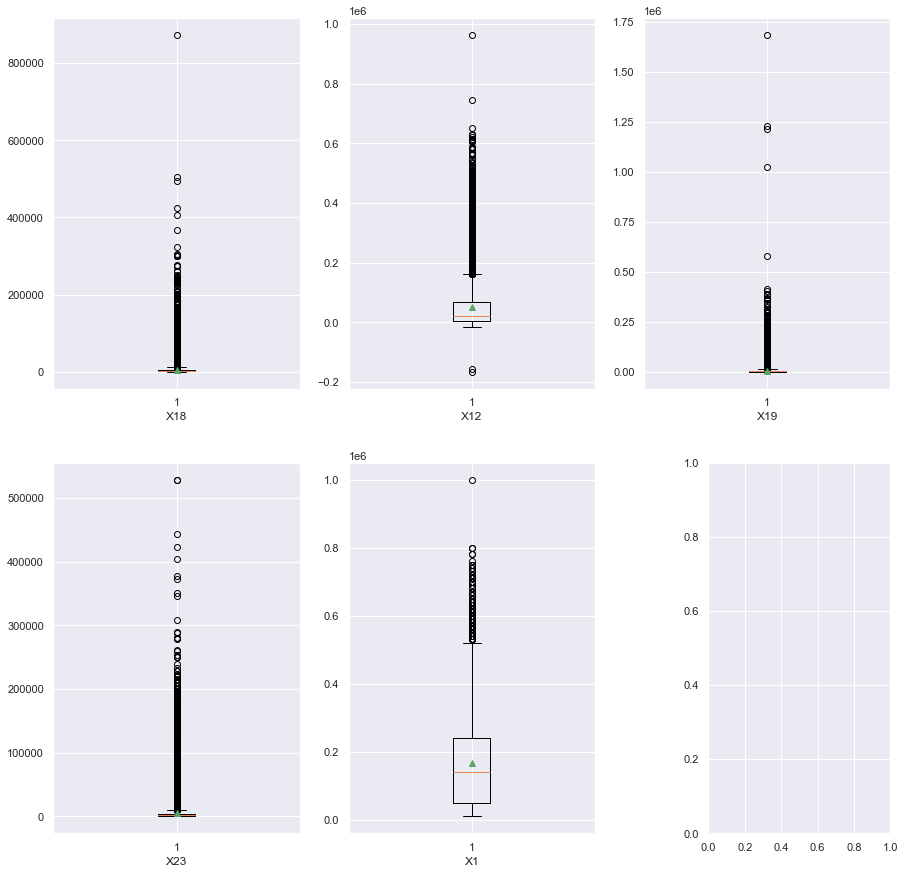

In [26]:
sns.set(rc={'figure.figsize':(15,15)})
cols = ['X18','X12', 'X19', 'X23', 'X1']
fig, axes = plt.subplots(2, 4)
k = 0
for col in cols:
  plt.subplot(2,3,k+1) 
  plt.boxplot(df[col], showmeans=True)
  plt.xlabel(col)
  k+=1

plt.show()

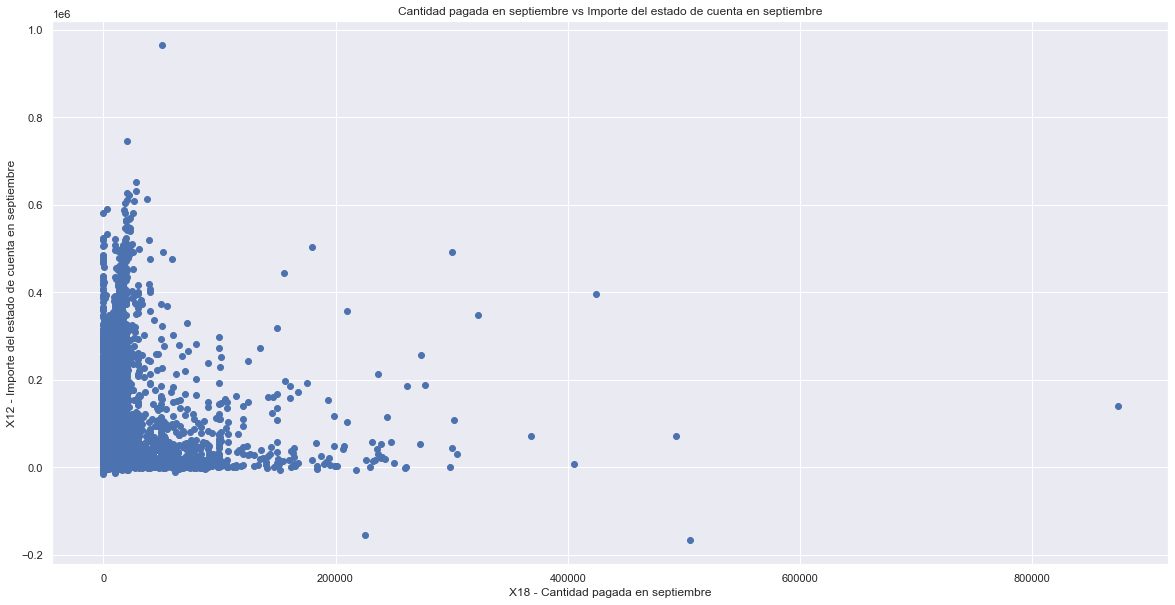

In [34]:
sns.set(rc={'figure.figsize':(20, 10)})
plt.scatter( df['X18'], df['X12'])
plt.title("Cantidad pagada en septiembre vs Importe del estado de cuenta en septiembre")
plt.xlabel('X18 - Cantidad pagada en septiembre')
plt.ylabel('X12 - Importe del estado de cuenta en septiembre')
plt.show()

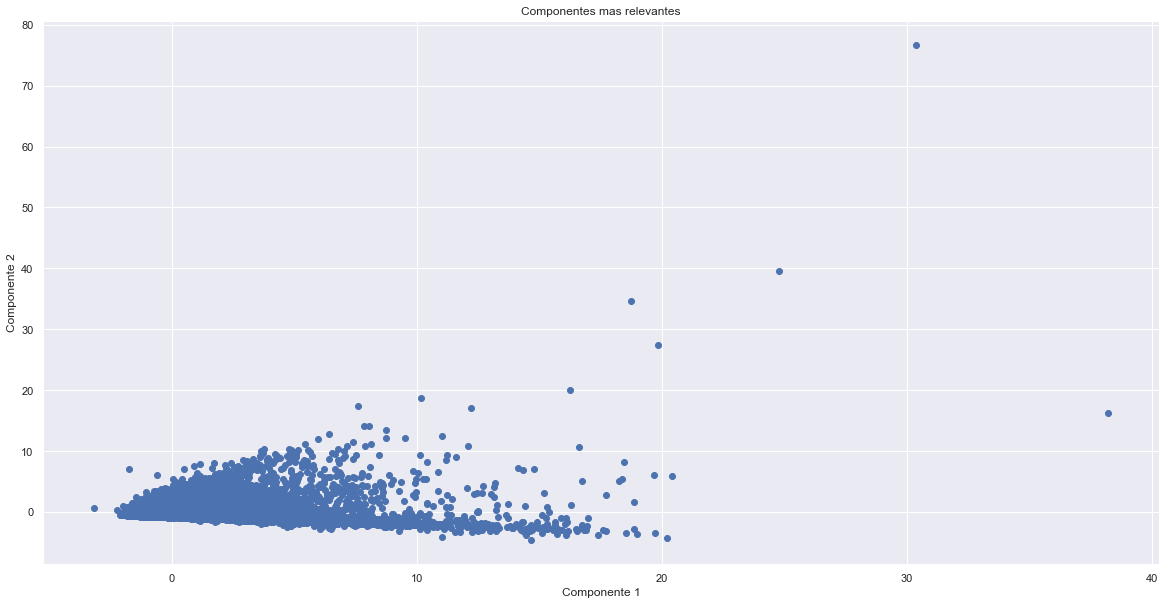

In [36]:
sns.set(rc={'figure.figsize':(20, 10)})
plt.scatter( components[:, 0], components[:, 1])
plt.title("Componentes mas relevantes")
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

### Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.


1. Se puede ver que en el gráfico de los boxplot la mayoría de los datos se presentan como outliers ya que en la mayoría de las variables las cantidades de pago se representan en la escala de decenas de miles y gran parte de la distribución de los datos (cuartiles del 25 al 75%) se encuentran por debajo de 10k

2. En el caso del segundo gráfico se utilizó el scatter plot para ver si existía una dependencia lineal entre los datos de las variables X12 y X18 ya que estas fueron las mas relevantes para las componentes 1 y 2 de PCA, sin embargo se puede observar que PCA encuentra relevancia incluso cuando no hay una dependencia lineal entre las variables.

3. Para el último scatterplot se utilizaron las componentes 1 y 2 para ver si existía un patrón lineal entre ellas, sin embargo, es muy baja y para poder determinar el comportamineto de los datos se tiene que utilizar mas componentes para mantener la integridad de los datos.